## 读取数据

In [3]:
import pandas as pd

train_labeled = pd.read_csv('data/raw/cn_train.csv', encoding='utf-8')

In [4]:
train_labeled.shape

(12677, 6)

In [5]:
train_labeled.columns

Index(['ID', 'Dialogue_id', 'Utterance_id', 'Speaker', 'Sentence', 'Label'], dtype='object')

In [6]:
train_labeled.head(5)

,ID,Dialogue_id,Utterance_id,Speaker,Sentence,Label
0,0,0,0,卖油条小刘,我说,0
1,1,0,1,保姆小张,干啥子嘛？,0
2,2,0,2,卖油条小刘,你看你往星空看月朦胧，鸟朦胧,1
3,3,0,3,卖油条小刘,咱是不是歇一下这双，疲惫的双腿？,0
4,4,0,4,卖油条小刘,快把我累死了,0


## 标签分布

In [7]:
train_labeled['Label'].value_counts()

0    9031
1    3646
Name: Label, dtype: int64

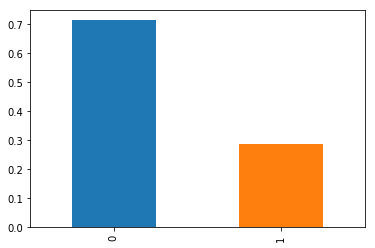

In [8]:
%matplotlib inline
train_labeled['Label'].value_counts(normalize=True).plot(kind='bar');

## 文本长度

In [9]:
train_labeled['Sentence'].str.len().describe()

count    12677.000000
mean        15.119508
std         10.051367
min          1.000000
25%          8.000000
50%         13.000000
75%         20.000000
max        143.000000
Name: Sentence, dtype: float64

## 数据划分

In [11]:
from sklearn.model_selection import train_test_split

dataset = train_labeled[['Dialogue_id', 'Speaker', 'Sentence', 'Label']]
train, valid = train_test_split(dataset, test_size=0.2, stratify=train_labeled['Label'], random_state=1000)
train.to_csv('data/preprocess/cn_train.tsv', index=False, header=False, sep='\t',encoding='utf-8')
valid.to_csv('data/preprocess/cn_dev.tsv', index=False, header=False, sep='\t', encoding='utf-8')

In [12]:
dataset.to_csv('data/preprocess/cn_total.tsv', index=False, header=False, sep='\t', encoding='utf-8')

# 英文

In [13]:
train_labeled_en = pd.read_csv('data/raw/en_train.csv', encoding='utf-8')

In [14]:
train_labeled_en.shape

(7472, 6)

In [15]:
train_labeled_en.columns

Index(['ID', 'Dialogue_id', 'Utterance_id', 'Speaker', 'Sentence', 'Label'], dtype='object')

In [18]:
train_labeled_en.head(5)

,ID,Dialogue_id,Utterance_id,Speaker,Sentence,Label
0,0,0,0,Chandler,also I was the point person on my companys tr...,0
1,1,0,1,The Interviewer,You mustve had your hands full.,0
2,2,0,2,Chandler,That I did. That I did.,0
3,3,0,3,The Interviewer,So lets talk a little bit about your duties.,0
4,4,0,4,Chandler,My duties? All right.,1


## 标签分布

In [20]:
train_labeled_en['Label'].value_counts()

0    5699
1    1773
Name: Label, dtype: int64

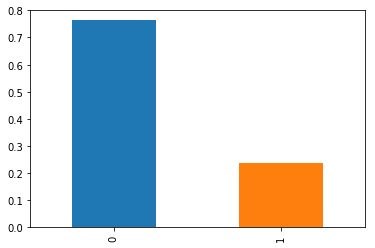

In [21]:
%matplotlib inline
train_labeled_en['Label'].value_counts(normalize=True).plot(kind='bar');

## 文本长度

In [36]:
train_labeled_en['Sentence'].apply(lambda x : len(str(x).split(" "))).describe()

count    7472.000000
mean        8.019540
std         6.346561
min         1.000000
25%         3.000000
50%         6.000000
75%        11.000000
max        69.000000
Name: Sentence, dtype: float64

## 数据划分

In [16]:
from sklearn.model_selection import train_test_split

dataset = train_labeled_en[['Dialogue_id', 'Speaker', 'Sentence', 'Label']]
train, valid = train_test_split(dataset, test_size=0.2, stratify=train_labeled['Label'], random_state=1000)
train.to_csv('preprocess_data/en_train.tsv', index=False, header=False, sep='\t',encoding='utf-8')
valid.to_csv('preprocess_data/en_dev.tsv', index=False, header=False, sep='\t', encoding='utf-8')

In [17]:
dataset.to_csv('data/preprocess/en_total.tsv', index=False, header=False, sep='\t', encoding='utf-8')